<a href="https://colab.research.google.com/github/Ilhamarr/Assigment1---2D-3D-transformation/blob/master/1313617018_UTS_IlhamArrosyid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from skimage import data
from skimage.color import rgb2lab, lab2rgb
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [46]:
# upload your image to Google Photos, then load the URL 
# Warning DO NOT put your image in Google Drive, unreadable from Google Colabs
path = 'https://lh3.googleusercontent.com/EKz-0Ryf1XFu99RQlpyQdeS5iWsuDudoSsgkf3aveM6M0NpfcUExkGfy8oG6cA4iLP7gFmg_BeIIVMFIXoO94RGh1N2uztJuP5Q0zctwSsODg28mERAf-DNBa3hA8oUl2oI_mWp2G_SgBzTlslGYwQTp9SgZ-_GS37xDuJWuFSPkDVju34xGt9C347fSRXbPj2NDd0krCUten99DLAxyjtvtsxdZnkf_QNchMV_cgPxScEXHD2TBnp-uu3UoGvemw_AmZtawIquatjF7Rc5JWpfMM0F0zUVRDH72CvdN7UbpS50pclYi8BYXA1ORBNa8eVPTGL7rCeKOHFdJV-7-U5BEjGydECy1N_GRPAeLz8jWRD-vVFZM1rE7yxQpy9gnt8oJxsXz96XaUc-lHR7u7Ngoebi_2O2mosVziisZJkIKjFwemNejlSGvdL5lqK_dw4N-mJjuZSqKXmQA_c_n4HLnwbqhBNjvfOzi4LxrDWrOdT-yANQV0H42IZP9ycTWnHvQNZcpAKXXYwp7d1JeSQJCVJlY1OKv64UInHLYH_Zs4y5Q7JEhgTVPB-Hr8nSOM9U9qeQVX2z5PU0xZzpQ8dDAUtlqK3jiQ2TIgsH1ZoFfNzbi9gKT-fQhpgrl89zXpXrzqwGa4aQPbGRDJ1xTPhTx4IArBPQ4O2E-NQZfvCrx2jX4w34KVKAOq07swg=w886-h664-no'
image = io.imread(path)
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(664, 886, 3)


In [67]:
# TODO: you are going to replace rgb2lab from sci-kit module with your own implementation
#imlab = rgb2lab(image)
#print(type(image))
#print(imlab.shape)

[278.5201, -168.6903, 385.6784]


In [70]:
def RGB2XYZ(RGB):
    #the operator @ cannot accept 2 lists, but can accept 1 list and 1 nd-array
    #matrix M according to http://www.brucelindbloom.com/index.html?Eqn_RGB_to_XYZ.html
    def Inverse_sRGB_Companding(x):
        if x > 0.04045:
            return ((x + 0.055) / 1.055)** 2.4
        else:
            return x / 12.92
    # multiple with 100 isn't said in the website
    tmp_RGB=np.array([[100*Inverse_sRGB_Companding(np.asscalar(x)/255.0) for x in list(RGB)]]).T
    M_AdobeRGB = np.array(
        [[0.5767309,  0.1855540,  0.1881852],
        [0.2973769,  0.6273491,  0.0752741],
        [0.0270343,  0.0706872,  0.9911085]])
    M_sRGB=np.array(
        [[0.4124564,  0.3575761,  0.1804375],
        [0.2126729,  0.7151522,  0.0721750],
        [0.0193339,  0.1191920,  0.9503041]])
    M_CIERGB = np.array(
        [[0.4887180,  0.3106803,  0.2006017],
         [0.1762044,  0.8129847,  0.0108109],
         [0.0000000,  0.0102048,  0.9897952]])
    return np.matmul(M_sRGB,tmp_RGB)
def XYZ2LAB(XYZ):
    #f(x) according to http://www.brucelindbloom.com/index.html?Eqn_RGB_to_XYZ.html
    def f(t):
        if t > 216/24389:
            return t ** (1 / 3)
        else:
            return (24389 / 27 * t + 16) / 116            
    #because XYZ is like [[1],[2],[3]]. XYZ[0] will be array([1]). So it should be XYZ[0,0].
    #Or use np.asscalar()
    return np.array(
        [[116*f(XYZ[1,0] / 100.0)-16,
        500*(f(XYZ[0,0] / 95.13) - f(XYZ[1,0] / 100.0)),
        200*(f(XYZ[1,0] / 100.0) - f(XYZ[2,0] / 108.8))]]).T
def RGB2LAB(RGB):
    return XYZ2LAB(RGB2XYZ(RGB))
def deltaE_CIE76(LAB1, LAB2):
    deltaL = LAB2[0,0] - LAB1[0,0]
    deltaA = LAB2[1,0] - LAB1[1,0]
    deltaB = LAB2[2,0] - LAB1[2,0]
    return (deltaL ** 2 + deltaA ** 2 + deltaB ** 2)** (1/2)

RGB1 = np.array([[int(x) for x in [0xC9, 0xC4, 0xBE]]]).T
RGB2 = np.array([[int(x) for x in [0xC6, 0xC4, 0xC5]]]).T
print(RGB2XYZ(RGB1))
print(RGB2XYZ(RGB2))
print(RGB2LAB(RGB1))
print(RGB2LAB(RGB2))
print("deltaE =", deltaE_CIE76(RGB2LAB(RGB1), RGB2LAB(RGB2)))

[[53.12034219]
 [55.61540017]
 [56.64162253]]
[[53.10505028]
 [55.51692194]
 [60.73065802]]
[[79.39442869]
 [ 0.55212453]
 [ 3.5819647 ]]
[[79.33809043]
 [ 0.75544894]
 [-0.29722038]]
deltaE = 3.88491849143061


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.


In [69]:
def rgb2lab ( inputColor ) :

   num = 0
   RGB = [644,866,3]

   for value in inputColor :
       value = float(value) / 255

       if value > 0.04045 :
           value = ( ( value + 0.055 ) / 1.055 ) ** 2.4
       else :
           value = value / 0.17697

       RGB[num] = value * 100
       num = num + 1

   XYZ = [664, 866, 3,]

   X = RGB [0] * 0.49 + RGB [1] * 0.31 + RGB [2] * 0.20
   Y = RGB [0] * 0.17697 + RGB [1] * 0.81240 + RGB [2] * 0.01063
   Z = RGB [0] * 0.00 + RGB [1] * 0.01 + RGB [2] * 0.999
   XYZ[ 0 ] = round( X, 4 )
   XYZ[ 1 ] = round( Y, 4 )
   XYZ[ 2 ] = round( Z, 4 )

   XYZ[ 0 ] = float( XYZ[ 0 ] ) / 95.047         # ref_X =  95.047
   XYZ[ 1 ] = float( XYZ[ 1 ] ) / 100.0          # ref_Y = 100.000
   XYZ[ 2 ] = float( XYZ[ 2 ] ) / 108.883        # ref_Z = 108.883

   num = 0
   for value in XYZ :

       if value > 0.008856 :
           value = value ** ( 0.3333333333333333 )
       else :
           value = ( 7.787 * value ) + ( 16 / 116 )

       XYZ[num] = value
       num = num + 1

   Lab = [0, 0, 0]

   L = ( 116 * XYZ[ 1 ] ) - 16
   a = 500 * ( XYZ[ 0 ] - XYZ[ 1 ] )
   b = 200 * ( XYZ[ 1 ] - XYZ[ 2 ] )

   Lab [ 0 ] = round( L, 4 )
   Lab [ 1 ] = round( a, 4 )
   Lab [ 2 ] = round( b, 4 )

   return Lab
print(rgb2lab(image.shape))


[278.5201, -168.6903, 385.6784]


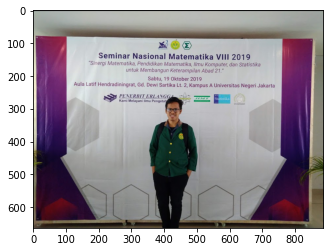

In [63]:
plt.imshow(image)
plt.show()

In [0]:
def extract_single_dim_from_LAB_convert_to_RGB(image,idim):
    '''
    image is a single lab image of shape (None,None,3)
    '''
    z = np.zeros(image.shape)
    if idim != 0 :
        z[:,:,0]=80 ## I need brightness to plot the image along 1st or 2nd axis
    z[:,:,idim] = image[:,:,idim]
    z = lab2rgb(z)
    return(z)

In [0]:
def plot_lab_color(image):
  l_channel = extract_single_dim_from_LAB_convert_to_RGB(imlab, 0)
  plt.imshow(l_channel)
  plt.show()
  a_channel = extract_single_dim_from_LAB_convert_to_RGB(imlab, 1)
  plt.imshow(a_channel)
  plt.show()
  b_channel = extract_single_dim_from_LAB_convert_to_RGB(imlab, 2)
  plt.imshow(b_channel)
  plt.show()

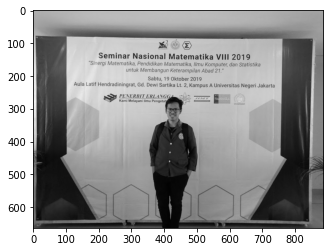

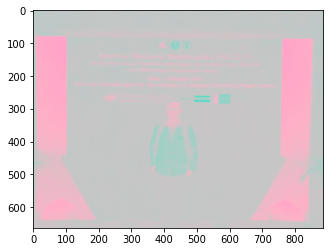

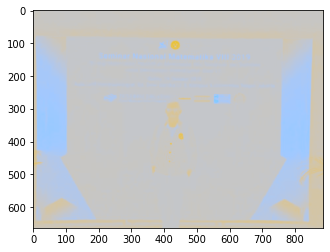

In [36]:
plot_lab_color(imlab)
# TODO: extra task compare rgb2lab from sci-kit image with your own implementation. Then display side by side as comparison. 